In [353]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import pickle
import string
import datetime

In [354]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [355]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [356]:
train = pd.read_csv('./train_dataset.csv')
train

,ID,DATE,TARGET,AMT_CREDIT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,Highest_balance_over_last_12months,payment_over_balance_ratio,CNT_total_drawings,payment_cover_ratio_min,payment_cover_ratio_mean,payment_diff_min,payment_diff_max,payment_diff_mean,Day_past_due_max,Day_past_due_mean
0,352276,2002-09-20,0,545040.0,Cash loans,M,Y,Y,0,202500.0,...,NaN,NaN,NaN,1.000000,1.000000,0.0,0.000,0.000000,-13.0,-22.181818
1,376831,2000-06-21,0,454500.0,Cash loans,M,Y,Y,0,180000.0,...,0.00,0.000000,0.0,1.000000,1.000000,0.0,0.000,0.000000,-7.0,-12.444444
2,437216,2000-02-08,0,260640.0,Cash loans,M,Y,N,0,135000.0,...,NaN,NaN,NaN,1.000000,1.000000,0.0,0.000,0.000000,-15.0,-18.111111
3,145499,2001-03-03,0,735133.5,Cash loans,F,N,Y,0,225000.0,...,NaN,NaN,NaN,1.000000,1.000000,0.0,0.000,0.000000,-4.0,-23.045455
4,437571,2001-01-15,0,935640.0,Cash loans,F,N,N,0,247500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250403,253636,2002-12-26,0,592560.0,Cash loans,F,N,Y,1,135000.0,...,NaN,NaN,NaN,0.001453,0.636364,0.0,5070.240,1846.407273,5.0,-12.818182
250404,431694,2001-01-28,0,481495.5,Cash loans,M,N,N,0,112500.0,...,NaN,NaN,NaN,1.000000,1.000000,0.0,0.000,0.000000,0.0,-19.666667
250405,269062,2002-07-07,0,1456587.0,Cash loans,M,N,Y,1,202500.0,...,262133.91,0.389936,3.0,0.017586,0.973333,0.0,128.205,3.480000,14.0,-6.026667
250406,288157,2002-03-13,0,1006920.0,Cash loans,F,N,N,0,130500.0,...,NaN,NaN,NaN,1.000000,1.000000,0.0,0.000,0.000000,-6.0,-17.068182


In [357]:
test = pd.read_csv('./test_dataset.csv')
test

,ID,DATE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,...,Highest_balance_over_last_12months,payment_over_balance_ratio,CNT_total_drawings,payment_cover_ratio_min,payment_cover_ratio_mean,payment_diff_min,payment_diff_max,payment_diff_mean,Day_past_due_max,Day_past_due_mean
0,406351,2003-01-22,Cash loans,F,N,N,1,135000.0,39069.0,450000.0,...,NaN,NaN,NaN,0.000806,0.894737,0.000,6750.000,709.285263,9.0,-18.157895
1,341778,2003-01-05,Cash loans,F,N,N,0,135000.0,41791.5,481500.0,...,NaN,NaN,NaN,0.035343,1.417896,-188661.735,39179.565,-7987.057500,3.0,-20.129630
2,263389,2003-02-23,Cash loans,F,N,N,1,58500.0,13963.5,225000.0,...,NaN,NaN,NaN,0.050227,0.958333,0.000,9823.950,430.978125,15.0,-18.041667
3,366963,2003-02-17,Cash loans,M,N,Y,1,108000.0,15943.5,238500.0,...,0.00,0.000000,0.0,0.036279,0.885714,0.000,16944.750,1924.200000,5.0,-17.142857
4,341405,2003-02-13,Cash loans,F,Y,N,1,171000.0,9067.5,238500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27819,398330,2003-03-27,Cash loans,M,Y,N,0,157500.0,23413.5,472500.0,...,0.00,0.000000,0.0,1.000000,1.000000,0.000,0.000,0.000000,12.0,-1.798077
27820,367170,2003-02-22,Cash loans,F,Y,N,0,135000.0,37255.5,1350000.0,...,NaN,NaN,NaN,1.000000,1.630898,-77662.800,0.000,-11250.000000,0.0,-10.187500
27821,271225,2003-03-18,Cash loans,F,N,Y,1,56250.0,17145.0,405000.0,...,0.00,0.000000,0.0,0.006408,0.933333,0.000,7954.425,533.715000,9.0,-5.000000
27822,267203,2003-03-26,Cash loans,M,N,Y,0,157500.0,26446.5,900000.0,...,NaN,NaN,NaN,1.000000,1.000000,0.000,0.000,0.000000,-2.0,-7.333333


In [358]:
set(train.columns) - set(test.columns)

{'AMT_CREDIT', 'TARGET'}

In [359]:
pd.set_option('max_colwidth', 200)
pd.set_option('max_rows', 200)
train.corr().sort_values('TARGET')['TARGET']

EXT_SOURCE_3                           -0.182513
EXT_SOURCE_2                           -0.162131
EXT_SOURCE_1                           -0.156767
DAYS_EMPLOYED                          -0.076496
AMT_GOODS_PRICE                        -0.046132
payment_cover_ratio_min                -0.045805
FLOORSMAX_AVG                          -0.041090
FLOORSMAX_MEDI                         -0.040943
FLOORSMAX_MODE                         -0.040793
AMT_CREDIT                             -0.037794
Active                                 -0.036801
AMT_ANNUITY_mean                       -0.036227
REGION_POPULATION_RELATIVE             -0.034451
approved_credit_ratio_mean             -0.034310
ELEVATORS_AVG                          -0.032815
ELEVATORS_MEDI                         -0.032566
FLAG_DOCUMENT_6                        -0.032455
AMT_ANNUITY_min                        -0.032355
FLOORSMIN_AVG                          -0.031634
LIVINGAREA_AVG                         -0.031603
FLOORSMIN_MEDI      

In [360]:
train.corr().sort_values('AMT_CREDIT')['AMT_CREDIT']

app_Annuity_credit_ratio               -0.597666
app_Income_credit_ratio                -0.321556
REGION_RATING_CLIENT_W_CITY            -0.113711
REGION_RATING_CLIENT                   -0.104024
OWN_CAR_AGE                            -0.091112
payment_diff_min                       -0.075365
LTV_ratio_mean                         -0.072720
FLAG_DOCUMENT_6                        -0.071521
payment_diff_mean                      -0.069295
AMT_REQ_CREDIT_BUREAU_YEAR             -0.066119
DAYS_LAST_PHONE_CHANGE                 -0.064530
LTV_ratio_max                          -0.056111
CNT_total_drawings                     -0.054767
MONTHS_BALANCE-min                     -0.048700
LTV_ratio_min                          -0.045418
MONTHS_BALANCE-mean                    -0.044851
TARGET                                 -0.037794
SK_ID_PREV_count                       -0.032188
DAYS_BIRTH                             -0.030041
Highest_balance_over_last_12months     -0.026645
DEF_60_CNT_SOCIAL_CI

In [361]:
train.shape

(250408, 172)

In [362]:
test.shape

(27824, 170)

In [363]:
bad_features = ['XNA', 'FLAG_DOCUMENT_12', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_20', 'payment_cover_ratio_mean', 'FLAG_MOBIL', 'FLAG_DOCUMENT_5']
category_features = []
for col in train.select_dtypes(include='object').columns:
    category_features.append(col)
category_features = list(set(category_features) - set(bad_features) - set('ID') - set(['DATE']) - set(['TARGET', 'AMT_CREDIT']))
category_features

['EMERGENCYSTATE_MODE',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS']

In [364]:
bad_features = ['XNA', 'FLAG_DOCUMENT_12', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_20', 'payment_cover_ratio_mean', 'FLAG_MOBIL', 'FLAG_DOCUMENT_5']
category_features_test = []
for col in test.select_dtypes(include='object').columns:
    category_features_test.append(col)
category_features_test = list(set(category_features_test) - set(bad_features) - set('ID') - set(['DATE']) - set(['TARGET', 'AMT_CREDIT']))
category_features_test

['EMERGENCYSTATE_MODE',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'WALLSMATERIAL_MODE',
 'HOUSETYPE_MODE',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS']

In [365]:
interval_features = list(set(train.columns) - set(['ID']) - set(category_features) - set(bad_features) - set(['DATE']) - set(['TARGET', 'AMT_CREDIT']))
interval_features

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'FLAG_EMP_PHONE',
 'AMT_INCOME_TOTAL',
 'app_Annuity_credit_ratio',
 'AMT_ANNUITY_credit_ratio_max',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'APARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'AMT_ANNUITY_min',
 'BASEMENTAREA_MEDI',
 'Demand',
 'Interest_ratio_min',
 'ENTRANCES_MEDI',
 'FLAG_DOCUMENT_8',
 'NONLIVINGAPARTMENTS_AVG',
 'DAYS_LAST_PHONE_CHANGE',
 'REG_CITY_NOT_WORK_CITY',
 'Highest_balance_over_last_12months',
 'LTV_ratio_mean',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'LIVINGAPARTMENTS_AVG',
 'DAYS_REGISTRATION',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'LIVINGAREA_MODE',
 'approved_credit_ratio_mean',
 'Completed',
 'NONLIVINGAPARTMENTS_MEDI',
 'LANDAREA_AVG',
 'Returned to the store',
 'BASEMENTAREA_MODE',
 'approved_credit_ratio_min',
 'Active',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLOORSMIN_MEDI',
 'APARTMENTS_MEDI',
 'FLAG_WORK_PHONE',
 'BASEMENTAREA_AVG',
 'APARTMENTS_AVG',
 'Signed',
 'FLAG_DOCUMENT_16',
 'MONTHS_BALANCE-mean',
 'Day_past_due_max',
 '

In [366]:
len(category_features) + len(interval_features) + len(bad_features)

168

In [367]:
type(train['DATE'][0])

str

In [368]:
train['DATE'] = pd.to_datetime(train['DATE'], format='%Y-%m-%d')
train['DATE'] 

0        2002-09-20
1        2000-06-21
2        2000-02-08
3        2001-03-03
4        2001-01-15
            ...    
250403   2002-12-26
250404   2001-01-28
250405   2002-07-07
250406   2002-03-13
250407   2002-02-24
Name: DATE, Length: 250408, dtype: datetime64[ns]

In [369]:
test['DATE'] = pd.to_datetime(test['DATE'], format='%Y-%m-%d')
test['DATE'] 

0       2003-01-22
1       2003-01-05
2       2003-02-23
3       2003-02-17
4       2003-02-13
           ...    
27819   2003-03-27
27820   2003-02-22
27821   2003-03-18
27822   2003-03-26
27823   2003-03-03
Name: DATE, Length: 27824, dtype: datetime64[ns]

In [370]:
interval_features

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'FLAG_EMP_PHONE',
 'AMT_INCOME_TOTAL',
 'app_Annuity_credit_ratio',
 'AMT_ANNUITY_credit_ratio_max',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'APARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'AMT_ANNUITY_min',
 'BASEMENTAREA_MEDI',
 'Demand',
 'Interest_ratio_min',
 'ENTRANCES_MEDI',
 'FLAG_DOCUMENT_8',
 'NONLIVINGAPARTMENTS_AVG',
 'DAYS_LAST_PHONE_CHANGE',
 'REG_CITY_NOT_WORK_CITY',
 'Highest_balance_over_last_12months',
 'LTV_ratio_mean',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'LIVINGAPARTMENTS_AVG',
 'DAYS_REGISTRATION',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'LIVINGAREA_MODE',
 'approved_credit_ratio_mean',
 'Completed',
 'NONLIVINGAPARTMENTS_MEDI',
 'LANDAREA_AVG',
 'Returned to the store',
 'BASEMENTAREA_MODE',
 'approved_credit_ratio_min',
 'Active',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLOORSMIN_MEDI',
 'APARTMENTS_MEDI',
 'FLAG_WORK_PHONE',
 'BASEMENTAREA_AVG',
 'APARTMENTS_AVG',
 'Signed',
 'FLAG_DOCUMENT_16',
 'MONTHS_BALANCE-mean',
 'Day_past_due_max',
 '

In [371]:
from sklearn.preprocessing import LabelEncoder

def prepare_categorial_attributes(data_, category_columns_):
    label_encoder = LabelEncoder()
    res = data_.copy()
    d = {}
    for category_column in category_columns_:
        res[category_column] = label_encoder.fit_transform(res[category_column])
        classes = np.reshape(label_encoder.classes_, (len(label_encoder.classes_), 1))
        labels = label_encoder.transform(classes)
        labels = np.reshape(labels, (len(labels), 1))
        table = np.concatenate((classes, labels), axis=1)
        d[category_column] = table
    return res, d

In [372]:
train_transformed, train_cat_labels = prepare_categorial_attributes(data_ = train, category_columns_ = category_features)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [373]:
test_transformed, test_cat_labels = prepare_categorial_attributes(data_ = test, category_columns_ = category_features)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [374]:
features = interval_features + category_features + ['ID'] + ['DATE'] + ['TARGET'] + ['AMT_CREDIT']

In [375]:
features

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'FLAG_EMP_PHONE',
 'AMT_INCOME_TOTAL',
 'app_Annuity_credit_ratio',
 'AMT_ANNUITY_credit_ratio_max',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'APARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'AMT_ANNUITY_min',
 'BASEMENTAREA_MEDI',
 'Demand',
 'Interest_ratio_min',
 'ENTRANCES_MEDI',
 'FLAG_DOCUMENT_8',
 'NONLIVINGAPARTMENTS_AVG',
 'DAYS_LAST_PHONE_CHANGE',
 'REG_CITY_NOT_WORK_CITY',
 'Highest_balance_over_last_12months',
 'LTV_ratio_mean',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'LIVINGAPARTMENTS_AVG',
 'DAYS_REGISTRATION',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'LIVINGAREA_MODE',
 'approved_credit_ratio_mean',
 'Completed',
 'NONLIVINGAPARTMENTS_MEDI',
 'LANDAREA_AVG',
 'Returned to the store',
 'BASEMENTAREA_MODE',
 'approved_credit_ratio_min',
 'Active',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'FLOORSMIN_MEDI',
 'APARTMENTS_MEDI',
 'FLAG_WORK_PHONE',
 'BASEMENTAREA_AVG',
 'APARTMENTS_AVG',
 'Signed',
 'FLAG_DOCUMENT_16',
 'MONTHS_BALANCE-mean',
 'Day_past_due_max',
 '

In [376]:
len(features) + len(bad_features)

172

In [377]:
bad_features

['XNA',
 'FLAG_DOCUMENT_12',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_20',
 'payment_cover_ratio_mean',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_5']

In [378]:
train = train_transformed[features].copy()

In [379]:
train

,AMT_REQ_CREDIT_BUREAU_HOUR,FLAG_EMP_PHONE,AMT_INCOME_TOTAL,app_Annuity_credit_ratio,AMT_ANNUITY_credit_ratio_max,AMT_REQ_CREDIT_BUREAU_MON,APARTMENTS_MODE,NONLIVINGAREA_MODE,AMT_ANNUITY_min,BASEMENTAREA_MEDI,...,WALLSMATERIAL_MODE,HOUSETYPE_MODE,ORGANIZATION_TYPE,OCCUPATION_TYPE,CODE_GENDER,NAME_FAMILY_STATUS,ID,DATE,TARGET,AMT_CREDIT
0,0.0,1,202500.0,0.048877,0.050000,0.0,NaN,NaN,2250.00,NaN,...,7,3,33,16,1,3,352276,2002-09-20,0,545040.0
1,NaN,1,180000.0,0.039030,0.181836,NaN,0.2658,0.0015,3375.00,NaN,...,4,0,24,8,1,3,376831,2000-06-21,0,454500.0
2,0.0,1,135000.0,0.080180,0.105110,0.0,NaN,NaN,7038.18,0.0443,...,5,0,33,18,1,1,437216,2000-02-08,0,260640.0
3,NaN,0,225000.0,0.044049,0.116700,NaN,0.2658,0.0273,5968.35,0.2273,...,5,0,57,18,0,4,145499,2001-03-03,0,735133.5
4,0.0,1,247500.0,0.092675,NaN,0.0,0.3330,0.0140,NaN,0.2155,...,5,0,5,0,0,1,437571,2001-01-15,0,935640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250403,0.0,1,135000.0,0.060647,0.121591,0.0,NaN,NaN,5077.62,NaN,...,7,3,30,11,0,1,253636,2002-12-26,0,592560.0
250404,NaN,1,112500.0,0.074767,0.284900,NaN,0.0735,0.0093,13903.83,0.0493,...,5,0,5,14,1,3,431694,2001-01-28,0,481495.5
250405,0.0,1,202500.0,0.033047,0.136400,0.0,NaN,NaN,4378.23,NaN,...,7,3,9,8,1,1,269062,2002-07-07,0,1456587.0
250406,0.0,0,130500.0,0.039659,0.113810,1.0,NaN,NaN,5480.46,NaN,...,7,3,57,18,0,1,288157,2002-03-13,0,1006920.0


In [380]:


for col in list(set(train.columns) - set(['TARGET', 'AMT_CREDIT'])):
    train[col].replace(np.inf, 0, inplace=True)
    test[col].replace(np.inf, 0, inplace=True)
    fill_value = train[col].mean()
    train[col] = train[col].fillna(fill_value)
    test[col] = test[col].fillna(fill_value)

In [381]:
!pip install pyod -q 

In [382]:
from pyod.models.pca import PCA as pyod_PCA

def find_outliers(data_tr):
    pca = pyod_PCA(contamination=0.01, random_state=42)
    pca.fit(data_tr)
    train_labels = pca.predict(data_tr)
    return train_labels

In [383]:
train_labels = find_outliers(train[list(set(features) - set(['TARGET', 'AMT_CREDIT']) - set(['DATE']))])

In [384]:
train = train[train_labels == 0]

In [385]:
train.shape

(247903, 165)

In [386]:
train = train.sort_values(by='DATE')

In [387]:
train['DATE']

199292   2000-01-01
110252   2000-01-01
205071   2000-01-01
58743    2000-01-01
195528   2000-01-01
            ...    
218216   2002-12-31
72988    2002-12-31
228120   2002-12-31
47331    2002-12-31
197343   2002-12-31
Name: DATE, Length: 247903, dtype: datetime64[ns]

In [388]:
train_part = int(0.8 * train.shape[0])
train_t = train[:train_part]
test_t = train[train_part:]

In [389]:
amts_train = train_t.pop('AMT_CREDIT')
amts_train

199292    755190.0
110252    523597.5
205071    755190.0
58743     916470.0
195528    239850.0
            ...   
118345    454500.0
209550    225000.0
206233    298512.0
88151     323388.0
144507    949500.0
Name: AMT_CREDIT, Length: 198322, dtype: float64

In [390]:
amts_train.shape

(198322,)

In [391]:
targets_train = train_t.pop('TARGET')
targets_train

199292    0
110252    0
205071    0
58743     0
195528    0
         ..
118345    0
209550    0
206233    0
88151     0
144507    0
Name: TARGET, Length: 198322, dtype: int64

In [392]:
targets_train.shape

(198322,)

In [393]:
amts_test = test_t.pop('AMT_CREDIT')
amts_test

31218     521280.0
82739     284400.0
236177    808650.0
198807    358213.5
170955    677664.0
            ...   
218216    247500.0
72988     576072.0
228120    765261.0
47331     454500.0
197343    450000.0
Name: AMT_CREDIT, Length: 49581, dtype: float64

In [394]:
targets_test = test_t.pop('TARGET')
targets_test

31218     0
82739     0
236177    0
198807    0
170955    0
         ..
218216    0
72988     1
228120    0
47331     0
197343    1
Name: TARGET, Length: 49581, dtype: int64

In [395]:
test.shape

(27824, 170)

In [396]:
features = train_t.columns

In [397]:
features.shape

(163,)

In [398]:
test = test_transformed[features]

In [346]:
!pip install catboost

In [399]:
from catboost import CatBoostClassifier

In [400]:
clf = CatBoostClassifier(learning_rate=1e-1, loss_function='Logloss', eval_metric='AUC', n_estimators=2000, use_best_model=True)
clf.fit(train_t, targets_train, eval_set=(test_t, targets_test))

0:	test: 0.5921213	best: 0.5921213 (0)	total: 211ms	remaining: 7m
1:	test: 0.6428982	best: 0.6428982 (1)	total: 362ms	remaining: 6m 1s
2:	test: 0.6991703	best: 0.6991703 (2)	total: 498ms	remaining: 5m 31s
3:	test: 0.7117571	best: 0.7117571 (3)	total: 625ms	remaining: 5m 11s
4:	test: 0.7223256	best: 0.7223256 (4)	total: 755ms	remaining: 5m 1s
5:	test: 0.7255850	best: 0.7255850 (5)	total: 926ms	remaining: 5m 7s
6:	test: 0.7273453	best: 0.7273453 (6)	total: 1.07s	remaining: 5m 4s
7:	test: 0.7354245	best: 0.7354245 (7)	total: 1.23s	remaining: 5m 6s
8:	test: 0.7396683	best: 0.7396683 (8)	total: 1.41s	remaining: 5m 11s
9:	test: 0.7403078	best: 0.7403078 (9)	total: 1.54s	remaining: 5m 5s
10:	test: 0.7463497	best: 0.7463497 (10)	total: 1.69s	remaining: 5m 5s
11:	test: 0.7457894	best: 0.7463497 (10)	total: 1.81s	remaining: 5m
12:	test: 0.7451478	best: 0.7463497 (10)	total: 1.97s	remaining: 5m 1s
13:	test: 0.7452433	best: 0.7463497 (10)	total: 2.1s	remaining: 4m 58s
14:	test: 0.7461987	best: 0.7

In [401]:
pred = clf.predict(test_t)
(pred == targets_test).mean()

0.9171456808051471

In [402]:
targets = train.pop('TARGET')

In [403]:
amts = train.pop('AMT_CREDIT')

In [404]:
clf = CatBoostClassifier(learning_rate=1e-1, loss_function='Logloss', eval_metric='AUC', n_estimators=2000)
clf.fit(train_t, targets_train)

0:	total: 176ms	remaining: 5m 51s
1:	total: 315ms	remaining: 5m 14s
2:	total: 442ms	remaining: 4m 53s
3:	total: 561ms	remaining: 4m 40s
4:	total: 679ms	remaining: 4m 30s
5:	total: 859ms	remaining: 4m 45s
6:	total: 996ms	remaining: 4m 43s
7:	total: 1.15s	remaining: 4m 46s
8:	total: 1.31s	remaining: 4m 50s
9:	total: 1.44s	remaining: 4m 46s
10:	total: 1.58s	remaining: 4m 46s
11:	total: 1.71s	remaining: 4m 42s
12:	total: 1.86s	remaining: 4m 45s
13:	total: 2s	remaining: 4m 44s
14:	total: 2.14s	remaining: 4m 43s
15:	total: 2.29s	remaining: 4m 43s
16:	total: 2.43s	remaining: 4m 42s
17:	total: 2.57s	remaining: 4m 43s
18:	total: 2.73s	remaining: 4m 44s
19:	total: 2.89s	remaining: 4m 45s
20:	total: 3.02s	remaining: 4m 44s
21:	total: 3.17s	remaining: 4m 44s
22:	total: 3.33s	remaining: 4m 45s
23:	total: 3.46s	remaining: 4m 45s
24:	total: 3.59s	remaining: 4m 43s
25:	total: 3.73s	remaining: 4m 43s
26:	total: 3.9s	remaining: 4m 44s
27:	total: 4.03s	remaining: 4m 44s
28:	total: 4.18s	remaining: 4m 44s

In [405]:
pred = clf.predict(train)
(pred == targets).mean()

0.9319572574757062

In [406]:
predicts = clf.predict(test)

In [407]:
pds = clf.predict_proba(test)[:, 1]

In [408]:
from seaborn import scatterplot

In [409]:
pds_train = clf.predict_proba(train)[:, 1]

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


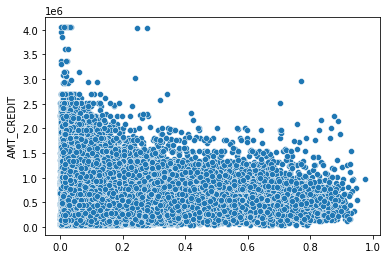

In [410]:
scatterplot(pds_train, amts)

In [411]:
amt_sum = 17447122764

In [412]:
train_temp = pd.read_csv('./train_dataset.csv')
train_temp['AMT_CREDIT'].sum()

157273038931.5

In [413]:
test_tmp = pd.read_csv('./test_dataset.csv')
test_tmp

,ID,DATE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,...,Highest_balance_over_last_12months,payment_over_balance_ratio,CNT_total_drawings,payment_cover_ratio_min,payment_cover_ratio_mean,payment_diff_min,payment_diff_max,payment_diff_mean,Day_past_due_max,Day_past_due_mean
0,406351,2003-01-22,Cash loans,F,N,N,1,135000.0,39069.0,450000.0,...,NaN,NaN,NaN,0.000806,0.894737,0.000,6750.000,709.285263,9.0,-18.157895
1,341778,2003-01-05,Cash loans,F,N,N,0,135000.0,41791.5,481500.0,...,NaN,NaN,NaN,0.035343,1.417896,-188661.735,39179.565,-7987.057500,3.0,-20.129630
2,263389,2003-02-23,Cash loans,F,N,N,1,58500.0,13963.5,225000.0,...,NaN,NaN,NaN,0.050227,0.958333,0.000,9823.950,430.978125,15.0,-18.041667
3,366963,2003-02-17,Cash loans,M,N,Y,1,108000.0,15943.5,238500.0,...,0.00,0.000000,0.0,0.036279,0.885714,0.000,16944.750,1924.200000,5.0,-17.142857
4,341405,2003-02-13,Cash loans,F,Y,N,1,171000.0,9067.5,238500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27819,398330,2003-03-27,Cash loans,M,Y,N,0,157500.0,23413.5,472500.0,...,0.00,0.000000,0.0,1.000000,1.000000,0.000,0.000,0.000000,12.0,-1.798077
27820,367170,2003-02-22,Cash loans,F,Y,N,0,135000.0,37255.5,1350000.0,...,NaN,NaN,NaN,1.000000,1.630898,-77662.800,0.000,-11250.000000,0.0,-10.187500
27821,271225,2003-03-18,Cash loans,F,N,Y,1,56250.0,17145.0,405000.0,...,0.00,0.000000,0.0,0.006408,0.933333,0.000,7954.425,533.715000,9.0,-5.000000
27822,267203,2003-03-26,Cash loans,M,N,Y,0,157500.0,26446.5,900000.0,...,NaN,NaN,NaN,1.000000,1.000000,0.000,0.000,0.000000,-2.0,-7.333333


In [414]:
test_tmp['PD'] = pds

In [415]:
amt_sum / test_tmp.shape[0]

627053.0033064979

In [416]:
pds.shape

(27824,)

In [417]:
cat1_clients = pds[pds < 0.05].shape[0]

In [418]:
cat2_clients = pds[(pds >= 0.05) & (pds < 0.1)].shape[0]

In [419]:
amts = np.zeros(predicts.shape)

In [420]:
amts[pds < 0.05] = 1000000

In [421]:
amts[(pds >= 0.05) & (pds < 0.1)] = 750000

In [422]:
amts[pds >= 0.1] = (amt_sum - 1000000 * cat1_clients - 750000 * cat2_clients) / (test_tmp.shape[0] - cat1_clients - cat2_clients)

In [423]:
amts.sum() - amt_sum

-3.814697265625e-06

In [424]:
test_tmp['Limit_new'] = amts

In [425]:
test_tmp

,ID,DATE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,...,CNT_total_drawings,payment_cover_ratio_min,payment_cover_ratio_mean,payment_diff_min,payment_diff_max,payment_diff_mean,Day_past_due_max,Day_past_due_mean,PD,Limit_new
0,406351,2003-01-22,Cash loans,F,N,N,1,135000.0,39069.0,450000.0,...,NaN,0.000806,0.894737,0.000,6750.000,709.285263,9.0,-18.157895,0.179507,28758.428704
1,341778,2003-01-05,Cash loans,F,N,N,0,135000.0,41791.5,481500.0,...,NaN,0.035343,1.417896,-188661.735,39179.565,-7987.057500,3.0,-20.129630,0.187303,28758.428704
2,263389,2003-02-23,Cash loans,F,N,N,1,58500.0,13963.5,225000.0,...,NaN,0.050227,0.958333,0.000,9823.950,430.978125,15.0,-18.041667,0.059522,750000.000000
3,366963,2003-02-17,Cash loans,M,N,Y,1,108000.0,15943.5,238500.0,...,0.0,0.036279,0.885714,0.000,16944.750,1924.200000,5.0,-17.142857,0.123923,28758.428704
4,341405,2003-02-13,Cash loans,F,Y,N,1,171000.0,9067.5,238500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.658115,28758.428704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27819,398330,2003-03-27,Cash loans,M,Y,N,0,157500.0,23413.5,472500.0,...,0.0,1.000000,1.000000,0.000,0.000,0.000000,12.0,-1.798077,0.157587,28758.428704
27820,367170,2003-02-22,Cash loans,F,Y,N,0,135000.0,37255.5,1350000.0,...,NaN,1.000000,1.630898,-77662.800,0.000,-11250.000000,0.0,-10.187500,0.151456,28758.428704
27821,271225,2003-03-18,Cash loans,F,N,Y,1,56250.0,17145.0,405000.0,...,0.0,0.006408,0.933333,0.000,7954.425,533.715000,9.0,-5.000000,0.215513,28758.428704
27822,267203,2003-03-26,Cash loans,M,N,Y,0,157500.0,26446.5,900000.0,...,NaN,1.000000,1.000000,0.000,0.000,0.000000,-2.0,-7.333333,0.617022,28758.428704


In [426]:
test_tmp.to_csv('answer.csv', index=False)

In [427]:
!pip install shap

In [428]:
import shap

auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.


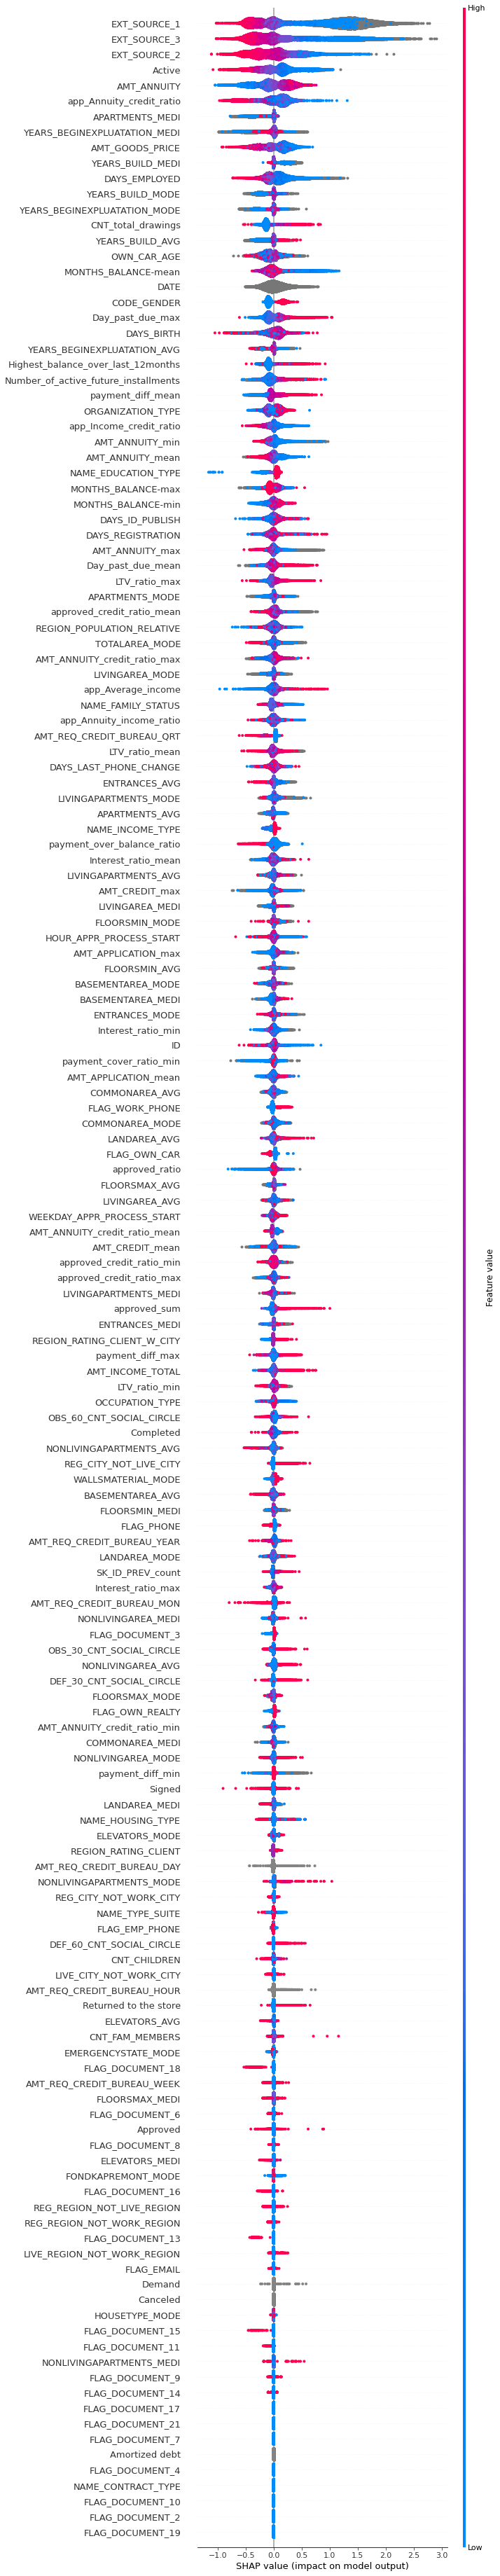

In [429]:
shap_test = shap.TreeExplainer(clf).shap_values(test)
shap.summary_plot(shap_test, test,
                      max_display=200, auto_size_plot=True)